## Pandas Practise_Part 2

#### World finance indicators data from 1970-2021
#### Get basic insights:
#### Top 5 countries by average GDP.
#### Countries with the highest inflation in the most recent year.
#### Group by Country and calculate:
#### Mean GDP per capita.
#### Max unemployment rate.
#### Total exports over all years.
#### Plot all above 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
path ="C:/Users/bbuser/Desktop/DataScience-Brain-Bytes/Team_members/from_alzahra/data/Global Economy Indicators.csv"
data_frame=pd.read_csv(path)
data_frame

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


### Top 5 Countries by Average GDP per Capita

In [10]:
# Calculate average GDP per capita for each country
avg_gdp = (
    data_frame.groupby(" Country ")[" Gross Domestic Product (GDP) "]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)
print("Top 5 Countries by Average GDP per Capita:")
print(avg_gdp)

Top 5 Countries by Average GDP per Capita:
 Country 
United States      9.321346e+12
Japan              3.417731e+12
China              3.372873e+12
Germany            2.095904e+12
United Kingdom     1.515096e+12
Name:  Gross Domestic Product (GDP) , dtype: float64


### Plot

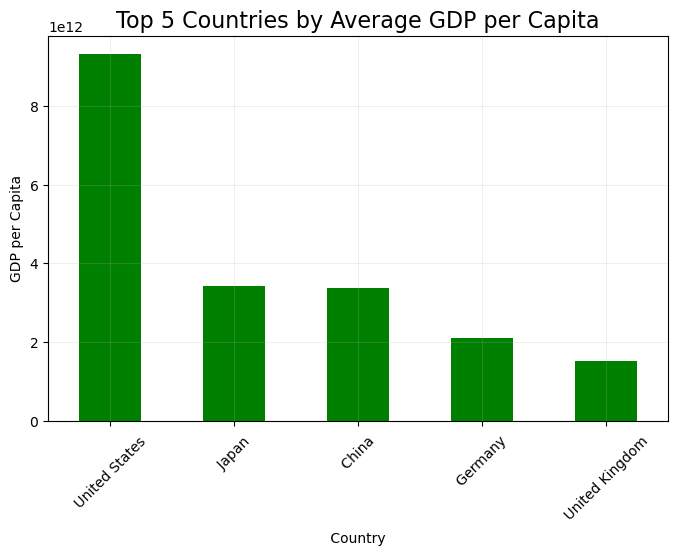

In [27]:
plt.figure(figsize=(8, 5))
avg_gdp.plot(kind="bar", color="green")
plt.title("Top 5 Countries by Average GDP per Capita", fontsize=16)
plt.ylabel("GDP per Capita")
plt.xticks(rotation=45)
plt.grid(True ,alpha=0.2)
plt.show()

### Countries with the Highest Inflation in the Most Recent Year

In [32]:
most_recent_year = data_frame[" Year "].max()
recent_data = data_frame[data_frame[" Year "] == most_recent_year] #filters the dataframe to only include rows from the most recent year

# Sort by inflation rate
high_inflation = (
    recent_data[[" Country ", " Per capita GNI "]]
      .sort_values(by=" Per capita GNI ", ascending=False)
      .dropna() #Removes any rows where inflation data is missing
      .head(5)
)
print(f"Top 5 Countries with Highest Inflation in {most_recent_year}:")
print(high_inflation)


Top 5 Countries with Highest Inflation in 2021:
             Country   Per capita GNI 
6036          Monaco            234317
5380   Liechtenstein            198294
843          Bermuda            112607
5464      Luxembourg             93369
7061          Norway             93149


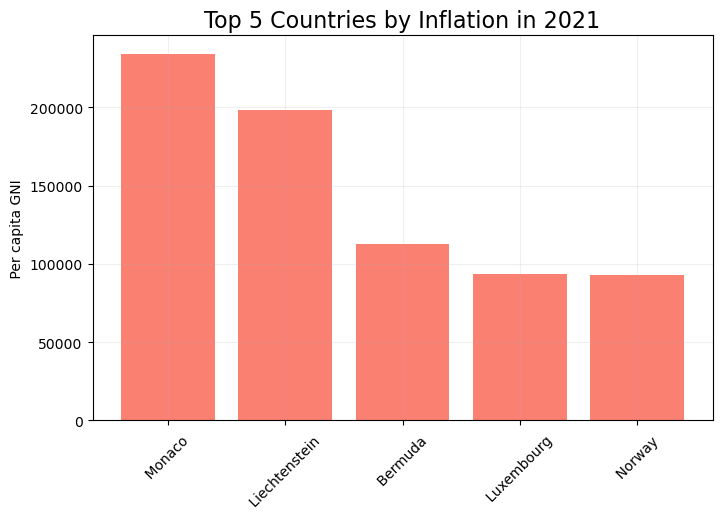

In [36]:
plt.figure(figsize=(8, 5))
plt.bar(high_inflation[" Country "], high_inflation[" Per capita GNI "], color="salmon")
plt.title(f"Top 5 Countries by Inflation in {most_recent_year}", fontsize=16)
plt.ylabel(" Per capita GNI ")
plt.xticks(rotation=45)
plt.grid(True ,alpha=0.2)
plt.show()

### Grouped Country Statistics, Mean GDP per Capita, Max Unemployment Rate, Total Exports (over all years)

In [47]:
# First: Clean the column names (removes leading/trailing spaces)
data_frame.columns = data_frame.columns.str.strip()

# Then perform the groupby with correct column names and functions
grouped = data_frame.groupby("Country").agg({
    "Per capita GNI": "mean",
    "Exports of goods and services": "sum"
}).rename(columns={
    "Per capita GNI": "Mean_GNI_per_capita",
    "Exports of goods and services": "Total_Exports"
})

# Display the result
print(grouped.head())




              Mean_GNI_per_capita  Total_Exports
Country                                         
Afghanistan            313.403846   6.354409e+10
Albania               2052.807692   7.889164e+10
Algeria               2530.923077   1.329415e+12
Andorra              26166.826923   2.405418e+10
Angola                1527.615385   9.233802e+11


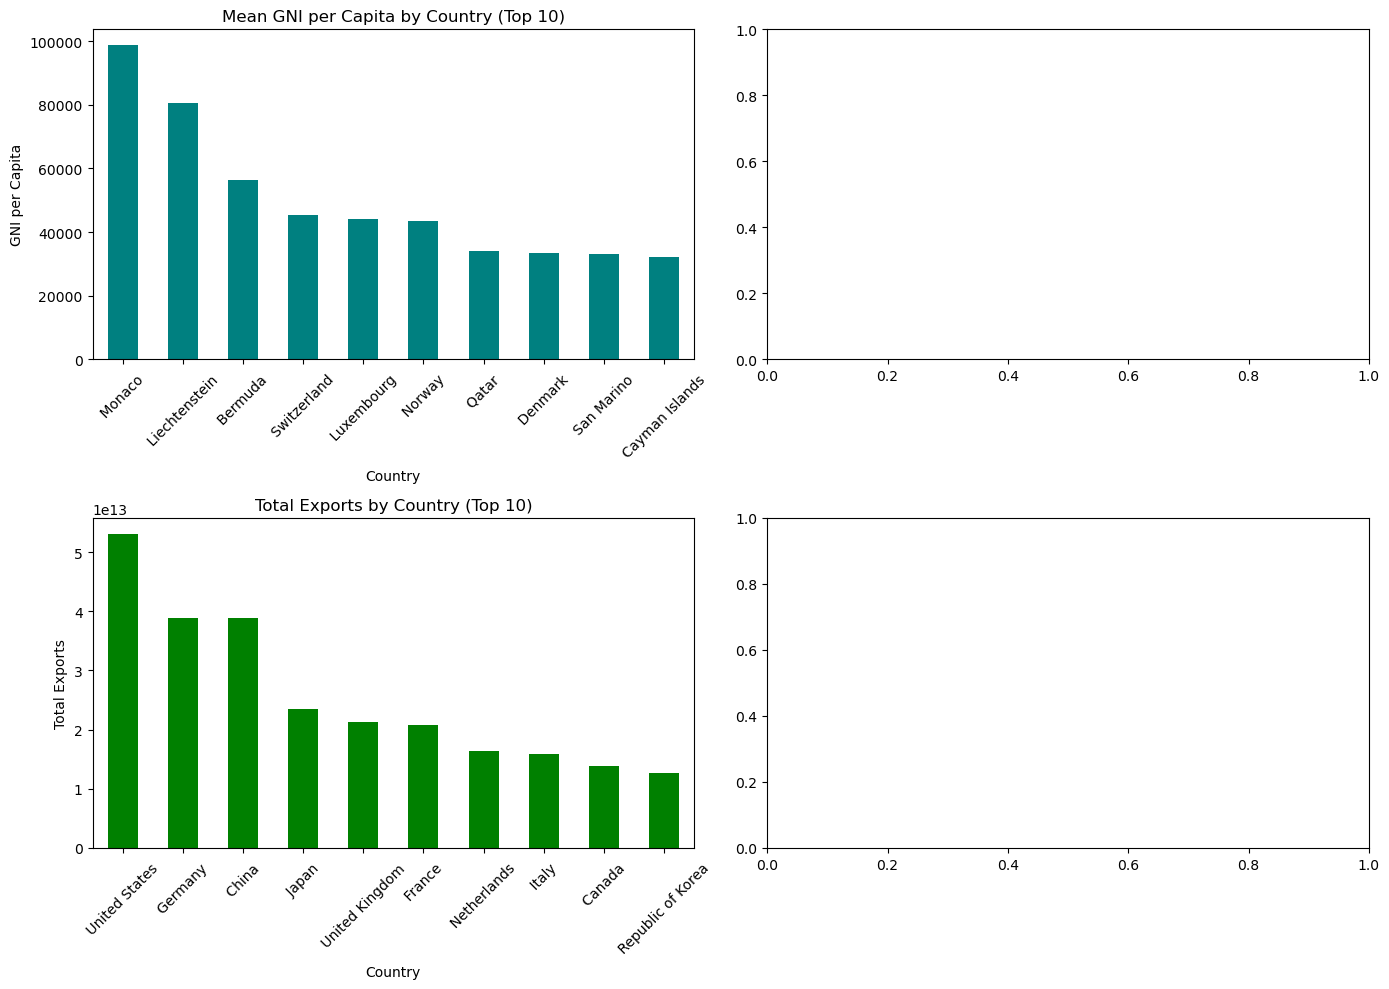

In [55]:
# Plot setup
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Mean GNI per Capita (Top 10)
grouped["Mean_GNI_per_capita"].sort_values(ascending=False).head(10).plot(
    kind="bar", color="teal", ax=axes[0, 0] #axes[0, 0] refers to the top-left subplot in a 2×2 grid of plots
)
axes[0, 0].set_title("Mean GNI per Capita by Country (Top 10)")
axes[0, 0].set_ylabel("GNI per Capita")
axes[0, 0].tick_params(axis='x', rotation=45)

# Total Exports (Top 10)
grouped["Total_Exports"].sort_values(ascending=False).head(10).plot(
    kind="bar", color="green", ax=axes[1, 0]
)
axes[1, 0].set_title("Total Exports by Country (Top 10)")
axes[1, 0].set_ylabel("Total Exports")
axes[1, 0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
